<a href="https://colab.research.google.com/github/InjamamChy/stock-prediction/blob/stckpred/machine_learning_finalprojectgspp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Initialization

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Step 2: Data Preprocessing

In [9]:
# Load the data
dataset = pd.read_csv('/content/Ftrain.csv')

In [11]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268
1,2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796
2,2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800
3,2015-01-07,25.280592,25.292759,24.914099,24.986401,24.986401,41301082
4,2015-01-08,24.831326,25.105074,24.482782,25.065184,25.065184,67071641


In [10]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1505,2020-12-23,86.405502,87.399498,86.251999,86.619003,86.619003,20676000
1506,2020-12-24,86.750000,87.300003,86.455498,86.942497,86.942497,6936000
1507,2020-12-28,87.581749,89.536400,87.316750,88.804497,88.804497,27860000
1508,2020-12-29,89.389503,89.622002,87.804497,87.935997,87.935997,25988000
1509,2020-12-30,88.100502,88.254753,86.279999,86.975998,86.975998,26122000


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1510 non-null   object 
 1   Open       1510 non-null   float64
 2   High       1510 non-null   float64
 3   Low        1510 non-null   float64
 4   Close      1510 non-null   float64
 5   Adj Close  1510 non-null   float64
 6   Volume     1510 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.7+ KB


In [13]:
training_set = dataset.iloc[:, 1:2].values

In [14]:
training_set

array([[26.378078],
       [26.091366],
       [25.679497],
       ...,
       [87.581749],
       [89.389503],
       [88.100502]])

In [15]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [16]:
# Create a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [17]:
# Reshape the data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Step 3: Building LSTM

In [18]:
# Build the LSTM model
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [19]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Step 4: Training the model

In [20]:
# Train the LSTM model
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
46/46 [==============================] - 19s 167ms/step - loss: 0.0198
Epoch 2/100
46/46 [==============================] - 7s 152ms/step - loss: 0.0042
Epoch 3/100
46/46 [==============================] - 9s 200ms/step - loss: 0.0046
Epoch 4/100
46/46 [==============================] - 7s 142ms/step - loss: 0.0044
Epoch 5/100
46/46 [==============================] - 8s 168ms/step - loss: 0.0037
Epoch 6/100
46/46 [==============================] - 6s 132ms/step - loss: 0.0039
Epoch 7/100
46/46 [==============================] - 8s 169ms/step - loss: 0.0047
Epoch 8/100
46/46 [==============================] - 6s 130ms/step - loss: 0.0030
Epoch 9/100
46/46 [==============================] - 8s 169ms/step - loss: 0.0031
Epoch 10/100
46/46 [==============================] - 7s 149ms/step - loss: 0.0032
Epoch 11/100
46/46 [==============================] - 8s 169ms/step - loss: 0.0028
Epoch 12/100
46/46 [==============================] - 6s 131ms/step - loss: 0.0030
Epoch 13/100

# Step 5: Making Predictions

In [21]:
# Load the test data
test_set = pd.read_csv('/content/Ftest.csv')

In [22]:
test_set.shape

(38, 7)

In [23]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       38 non-null     object 
 1   Open       38 non-null     float64
 2   High       38 non-null     float64
 3   Low        38 non-null     float64
 4   Close      38 non-null     float64
 5   Adj Close  38 non-null     float64
 6   Volume     38 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.2+ KB


In [24]:
real_stock_price = test_set.iloc[:, 1:2].values

In [25]:
real_stock_price

array([[ 87.876999],
       [ 86.25    ],
       [ 85.1315  ],
       [ 87.002998],
       [ 89.399002],
       [ 89.303497],
       [ 87.695999],
       [ 86.929001],
       [ 87.681   ],
       [ 86.9095  ],
       [ 87.612503],
       [ 91.572998],
       [ 94.900002],
       [ 94.783997],
       [ 96.033501],
       [ 94.442001],
       [ 94.126503],
       [ 92.196999],
       [ 92.308502],
       [ 92.678497],
       [ 96.127998],
       [103.650002],
       [103.444504],
       [103.5     ],
       [105.295502],
       [103.927002],
       [104.710503],
       [104.975502],
       [104.512497],
       [105.218002],
       [105.      ],
       [105.519501],
       [105.963501],
       [103.349998],
       [101.250504],
       [102.091499],
       [103.372498],
       [102.526001]])

In [26]:
real_stock_price.shape

(38, 1)

In [27]:
# Predict the test data
dataset_total = pd.concat((dataset['Open'], test_set['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [28]:
# creating a testset
X_test = []
for i in range(len(training_set) - 60, len(training_set)):
    X_test.append(training_set_scaled[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [29]:
#getting predicted stock prices
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

2/2 [==============================] - 2s 47ms/step


In [30]:
# Keep only the predicted prices for the test data
predicted_stock_price = predicted_stock_price[-len(test_set):]

# Step 6: Visualiztion

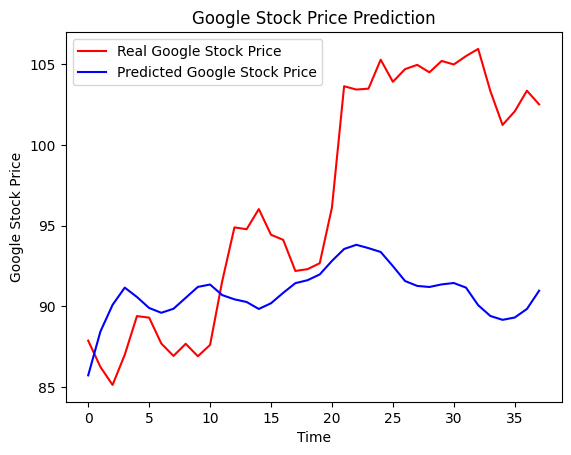

In [31]:
# Visualize the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

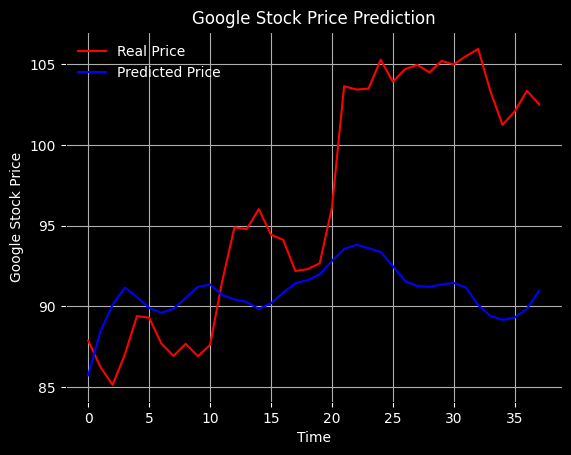

In [33]:
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['legend.frameon'] = 'False'
fig = plt.figure()
fig.patch.set_facecolor('xkcd:black')
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Price')
ax = plt.gca()
ax.set_facecolor('xkcd:black')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.grid(True)
plt.legend()
plt.show()

# Step 7: RMSE accuracy

In [34]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
accuracy = 100 - rmse
print("Test score: %.2f RMSE" % rmse)
print("Accuracy: %.2f" % accuracy)

Test score: 8.86 RMSE
Accuracy: 91.14
